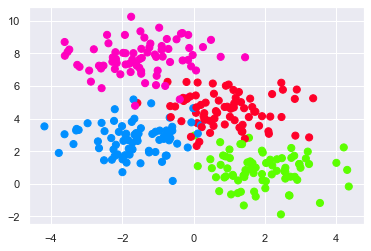

In [3]:
# X Decision Trees and Random Forest

# Random forest ist ein nicht-parametrischer Classifizierungsalgorithmus, der die Ergebnisse aus einem Ensemble von
# einfachen Schätzern kombiniert >> daher wird er als eine ensemble Methode bezeichnet
# >> Die Summe aus einfachen Schäzern (e.g. ein Mehrheitsentscheidung) wirkt dabei oft besser als die Einzelvorhersagen

# Random Forest ist ein ensemble Lerner, der auf Entschiedungspfaden (sog. decision trees basiert)
# ... Entscheidungspfade stellen einfach eine Reihe von Ja-Nein-Fragen, um die Klassifizierung herauszufinden (e.g. Wie 
#     groß ist das Tier > größer 1M [dann: Hat es Hörner?] vs. kleiner 1M  [dann: Geht es auf zwei Beinen] etc.)
# ... Durch die binären Fragen, wird die Klasse effizient bestimmt, da der Datensatz bei einer guten Frage ca. in der Hälfte
#     geteilt wird
# ... Maschine Learning Algorithmen teilen den Datensatz mit Hilfe von axis-aligned Splits und teilt die Label dann auf 
#     Basis der Mehrheit innerhalb der Unterteilungen zu

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=300, centers=4, random_state=0, cluster_std=1.0)
plt.scatter(X[:,0], X[:,1], c=y, s=50, cmap='gist_rainbow')


C:\Users\Manue\AppData\Local\Temp\ipykernel_36180\2068989936.py:24: UserWarning: The following kwargs were not used by contour: 'clim'
  contours = ax.contourf(xx, yy, Z, alpha=0.3,


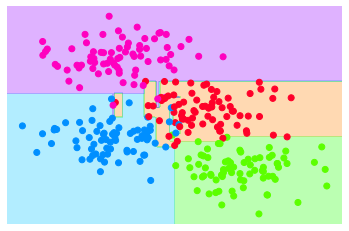

In [4]:
# X Decision Trees
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier().fit(X, y)

def visualize_classifier(model, X, y, ax=None, cmap='gist_rainbow'):
    ax = ax or plt.gca()
    
    # Plot the Training Points
    ax.scatter(X[:,0], X[:,1], c=y, cmap=cmap,
                        clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # fit the estimator
    model.fit(X, y)
    xx, yy = np.meshgrid(np.linspace(*xlim, num=200),
                        np.linspace(*ylim, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    
    # create a color plot with the results
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                          levels=np.arange(n_classes+1) -0.5,
                          cmap=cmap, clim=(y.min(), y.max()), zorder=1)
    
    ax.set(xlim=xlim, ylim=ylim)
visualize_classifier(DecisionTreeClassifier(), X, y)

# Mit größer werdender Tiefe entstehen seltsame Klassifizierungsregionen, die versuchen einzelne Punkte zu erfassen
# >> dies ist ein eindeutiges Zeichen von overfitting

C:\Users\Manue\AppData\Local\Temp\ipykernel_36180\2068989936.py:24: UserWarning: The following kwargs were not used by contour: 'clim'
  contours = ax.contourf(xx, yy, Z, alpha=0.3,


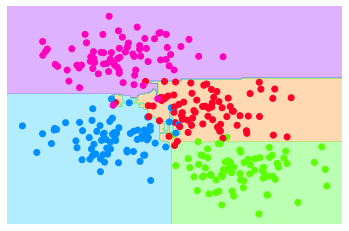

In [5]:
# X Random Forest
# Diese From von Overfitting wird ebenfalls deutlich, wenn der Datensatz an unterschiedlichen Subsets trainiert wird
# ... idR gibt es ähnlichkeiten zwischen den Entscheidungspfaden (e.g. vie Ecken werden richtig zugeordnet)
#     während es Schwierigkeiten in den Bereichen gibt, in denen die Cluster überlappen
#  >> Die Lösung ist mehrere Entscheidungspfade auf einen Teil der Daten zu berechnen und schließlich die Ergebnisse über
#     alle Entscheidungspfade zu mitteln >> dadurch wird einzelnes overfitting reduziert und die beste Lösung gefunden
#  >> Diese enselbe-Methode mit Entscheidungspfaden wird als random Forest bezeichnet

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

# DecisionTree Model
tree = DecisionTreeClassifier()

# Ensemble-Methode mit Entscheidungspfaden (random Forest)
# ... auf Basis von 100 Pfaden mit einem Sample aus 80% der Daten
bag = BaggingClassifier(tree, n_estimators=100, max_samples=0.8,
                       random_state=1)

bag.fit(X,y)
visualize_classifier(bag, X, y)

# Entscheidungspfade sind effektiver, wenn das Splitkriterium stochastisch unterstützt wird, sodass jede Unterteilung zur
# Verbesserung des Modells beiträgt und die Randomisierung noch gegeben ist (mehr dazu in der scikit-learn documentation)

C:\Users\Manue\AppData\Local\Temp\ipykernel_36180\2068989936.py:24: UserWarning: The following kwargs were not used by contour: 'clim'
  contours = ax.contourf(xx, yy, Z, alpha=0.3,


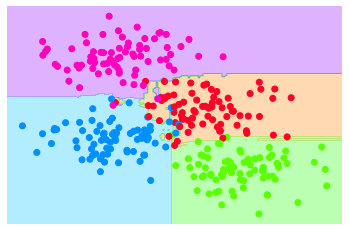

In [6]:
# X Der RandomForestCLassifier

# Ein Beispiel für eine stochastisch unterstützte Zerteilung des Datensatzes ist in dem RandomForestClassifier von scikit-learn
# implementiert
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=0)
visualize_classifier(model, X, y)

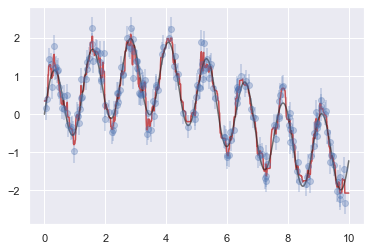

In [33]:
# X RandomForestRegression

# RandomForest Modelle können nicht nur zur Vorhersage von kategoriellen Daten verwendet werden, sondern auch zur Vorhersage
# von kontinuierlichen Daten >> Dieses Vorgehen ist die RandomForestRegression

# e.g Daten von einer langsamen und schnellen Oszillation (kurze und lange Schwingung von Signalen, gut erkennbar,
#     wenn einzeln geplottet)
rng = np.random.RandomState(42)
x = 10 * rng.rand(200)

def model(x, sigma=0.3):
    fast_oscillation = np.sin(5 * x)
    slow_oscillation = np.sin(0.5 * x)
    noise = sigma * rng. randn(len(x))
    
    return slow_oscillation + fast_oscillation  + noise

y = model(x)
plt.errorbar(x,y, 0.3, fmt='o', alpha=0.3)

# RandomForestRegression
from sklearn.ensemble import RandomForestRegressor

# Modell-Objekt erstellen
forest = RandomForestRegressor(200)

# Modell an Daten anpassen
forest.fit(x[:, None], y) # warum , None? :/

xfit = np.linspace(0, 10, 1000)
# Vorhersagedaten berechnen
yfit = forest.predict(xfit[:, None])
ytrue = model(xfit, sigma=0)

plt.plot(xfit, yfit, "-r")
plt.plot(xfit, ytrue, '-k', alpha=0.6)


              precision    recall  f1-score   support

           0       1.00      0.97      0.99        38
           1       1.00      0.98      0.99        44
           2       0.95      1.00      0.98        42
           3       0.98      0.98      0.98        45
           4       0.97      1.00      0.99        37
           5       0.98      0.98      0.98        48
           6       1.00      1.00      1.00        52
           7       1.00      0.96      0.98        50
           8       0.96      0.98      0.97        47
           9       0.98      0.98      0.98        47

    accuracy                           0.98       450
   macro avg       0.98      0.98      0.98       450
weighted avg       0.98      0.98      0.98       450



<AxesSubplot:>

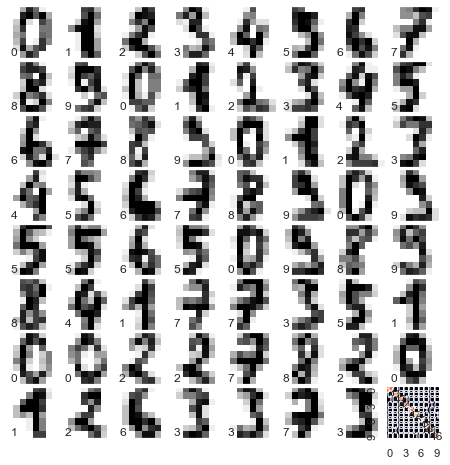

In [69]:
# X Beispiel für die Klassifizierung von Zahlen anhand von Bildern

from sklearn.datasets import load_digits
digits = load_digits()
digits.keys()

fig = plt.figure(figsize=(6,6))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

# Zahlen plotten
for i in range(64):
    ax = fig.add_subplot(8,8, i+1, xticks=[], yticks=[])
    ax.imshow(digits.images[i], cmap=plt.cm.binary, interpolation='nearest')
    
    # label ergänzen
    ax.text(0, 7, str(digits.target[i]))
    
# Klassifizierung der digits mit RandomForest
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(digits.data, digits.target,
                                               random_state=0)

model = RandomForestClassifier(n_estimators=1000)
model.fit(Xtrain, ytrain)
ypred = model.predict(Xtest)

# Classification Report
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(ypred, ytest))

conf = confusion_matrix(ypred, ytest, labels= [0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
print(conf.T)

Text(89.18, 0.5, 'predicted label')

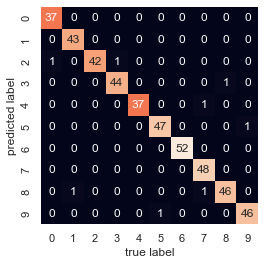

In [72]:
# Visualisierung in Heatmap
sns.heatmap(conf.T, square=True, annot=True, fmt='d', cbar=False)

plt.xlabel('true label')
plt.ylabel('predicted label')

# >> Vorhersage der Zahlen sehr akkurat :)

In [ ]:
# Random Forest Vorteile:
# - Training und Vorhersage sind sehr schnell, da die zugrundeliegend Entscheidungspfade relativ simpel sind
# - Der Mehrheitsentscheid erlaubt für eine probabilistische Entscheidung (siehe predict_proba()-method)
# - Das nicht-parametrische Verfahren ist sehr flexibel und kann daher für Bereiche eingesetzt werden, in denen andere
#   Modelle weniger gut funktioniere

# !! Es ist allerdings schwierig Vorhersagen aufgrund des random Forest Modells zu interpretieren
# >> Interpretierbare Ergebnisse sollten mit einem anderen Verfahren berechnet werden